<a href="https://colab.research.google.com/github/JimEverest/Deeplearning_Colab/blob/master/CatDog_V3(ResNet)_WNB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#For Tensorboard ext

In [0]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  print("TF2 Not working")
  pass

# Load the TensorBoard notebook extension
%load_ext tensorboard

TensorFlow 2.x selected.


#import

In [0]:
# In this exercise you will train a CNN on the FULL Cats-v-dogs dataset
# This will require you doing a lot of data preprocessing because
# the dataset isn't split into training and validation for you
# This code block has all the required inputs
import os
import zipfile
import random
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import datetime

In [0]:
from tensorflow import keras
from tensorflow.keras import layers

In [0]:
tf.__version__

'2.1.0-rc1'

In [0]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau,EarlyStopping
from tensorflow.keras.optimizers import Adam
import requests

# W and B
[Quick Start](https://docs.wandb.com/quickstart)

In [0]:
!pip install wandb

import wandb
from wandb.keras import WandbCallback

     |████████████████████████████████| 1.4MB 4.0MB/s 
     |████████████████████████████████| 102kB 10.7MB/s 
     |████████████████████████████████| 102kB 10.1MB/s 
     |████████████████████████████████| 92kB 11.4MB/s 
     |████████████████████████████████| 460kB 15.3MB/s 
     |████████████████████████████████| 71kB 9.8MB/s 
     |████████████████████████████████| 71kB 10.7MB/s 
  Created wheel for subprocess32: filename=subprocess32-3.5.4-cp36-none-any.whl size=6489 sha256=17a96cfd335cee66190db9d7d6824602dba7df58bf9cb197e93fcb5060aaf18f
  Stored in directory: /root/.cache/pip/wheels/68/39/1a/5e402bdfdf004af1786c8b853fd92f8c4a04f22aad179654d1
  Created wheel for shortuuid: filename=shortuuid-0.5.0-cp36-none-any.whl size=5499 sha256=c7c7575df552b746212d3c1856fb9e882b69f9100f5b961d202c6d8bf6f3ee72
  Stored in directory: /root/.cache/pip/wheels/3f/eb/fd/69e5177f67b505e44acbd1aedfbe44b91768ee0c4cd5636576
  Created wheel for gql: filename=gql-0.2.0-cp36-none-any.whl size=7630 sha256=36

In [0]:
!wandb login

wandb: You can find your API key in your browser here: https://app.wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter: cb037f6879017d7006c0f2f9c6f78b6333e2be90
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
Successfully logged in to Weights & Biases!


In [0]:
# name — A display name for this run
# notes — A multiline string description associated with the run
# config — a dictionary-like object to set as initial config
# project — the name of the project to which this run will belong
# tags — a list of strings to associate with this run as tags
# dir — the path to a directory where artifacts will be written (default: ./wandb)
# entity — the team posting this run (default: your username or your default team)
# job_type — the type of job you are logging, e.g. eval, worker, ps (default: training)
# group — a string by which to group other runs; see Grouping
# reinit — whether to allow multiple calls to wandb.init in the same process (default: False)
# id — A unique id for this run primarily used for resuming; see Resuming, must be globally unique within a project
# resume — if set to True, the run auto resumes; can also be a unique string for manual resuming; see Resuming (default: False)
# anonymous — can be "allow", "never", or "must". This enables or explicitly disables anonymous logging. (default: None)
# force — whether to force a user to be logged into wandb when running a script (default: False)
# magic — (bool, dict, or str, optional): magic configuration as bool, dict, json string, yaml filename. If set to True will attempt to auto-instrument your script. (default: None)
# sync_tensorboard — A boolean indicating whether or not copy all tensorboard logs wandb; see Tensorboard (default: False)
# monitor_gym — A boolean indicating whether or not to log videos generated by OpenAI Gym; see Ray Tune (default: False)
# allow_val_change — whether to allow wandb.config values to change, by default we throw an exception if config values are overwritten. (default: False)

wandb.init()
config = wandb.config

config.batch_size = 32
config.epochs=5

# Download/Split Data

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# don't have to exec each time...



def Download_file_2_Drive(url,path):
  file_url = url #"https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip"
  file_name = file_url.split("/")[-1]
  r = requests.get(file_url, stream = True)  

  dest_path = path #"/content/drive/Shared drives/Share/Data/"
  os.makedirs(dest_path, exist_ok=True)
  dest_path = os.path.join(dest_path,file_name)
  with open(dest_path, "wb") as file:  
      for block in r.iter_content(chunk_size = 1024): 
          if block:  
              file.write(block)  

Download_file_2_Drive("https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip", "/content/drive/Shared drives/Share/Data/")

# Download_file_2_Drive("https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip", "/content/drive/My Drive/Data/")




In [0]:
!nvidia-smi

Tue Jan 14 06:00:09 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.44       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P0    25W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
# !cp "/content/drive/Shared drives/Share/Data/kagglecatsanddogs_3367a.zip" "/tmp/cats-and-dogs1.zip"
!cp "/content/drive/My Drive/Data/kagglecatsanddogs_3367a.zip" "/tmp/cats-and-dogs1.zip"

In [0]:
# (Deprecated) Download to colab runtime tmp folder 

# If the URL doesn't work,   visit https://www.microsoft.com/en-us/download/confirmation.aspx?id=54765
# !wget --no-check-certificate \
#     "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip" \
#     -O "/tmp/cats-and-dogs.zip"



In [0]:
local_zip = '/tmp/cats-and-dogs1.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()


In [0]:
# Unzip to My Drive (Gdrive)

# local_zip = '/content/drive/My Drive/Data/kagglecatsanddogs_3367a.zip'
# zip_ref = zipfile.ZipFile(local_zip, 'r')
# zip_ref.extractall('/content/drive/My Drive/Data/')
# zip_ref.close()


In [0]:
print(len(os.listdir('/tmp/PetImages/Cat/')))
print(len(os.listdir('/tmp/PetImages/Dog/')))

# Expected Output:
# 12501
# 12501

12501
12501


In [0]:
# Use os.mkdir to create your directories
# You will need a directory for cats-v-dogs, and subdirectories for training
# and testing. These in turn will need subdirectories for 'cats' and 'dogs'
try:
    #YOUR CODE GOES HERE
    os.mkdir("/tmp/cats-v-dogs")
    os.mkdir("/tmp/cats-v-dogs/training")
    os.mkdir("/tmp/cats-v-dogs/training/cats")
    os.mkdir("/tmp/cats-v-dogs/training/dogs")
    os.mkdir("/tmp/cats-v-dogs/testing")
    os.mkdir("/tmp/cats-v-dogs/testing/cats")
    os.mkdir("/tmp/cats-v-dogs/testing/dogs")
except OSError:
    pass

In [0]:
# Write a python function called split_data which takes
# a SOURCE directory containing the files
# a TRAINING directory that a portion of the files will be copied to
# a TESTING directory that a portion of the files will be copie to
# a SPLIT SIZE to determine the portion
# The files should also be randomized, so that the training set is a random
# X% of the files, and the test set is the remaining files
# SO, for example, if SOURCE is PetImages/Cat, and SPLIT SIZE is .9
# Then 90% of the images in PetImages/Cat will be copied to the TRAINING dir
# and 10% of the images will be copied to the TESTING dir
# Also -- All images should be checked, and if they have a zero file length,
# they will not be copied over
#
# os.listdir(DIRECTORY) gives you a listing of the contents of that directory
# os.path.getsize(PATH) gives you the size of the file
# copyfile(source, destination) copies a file from source to destination
# random.sample(list, len(list)) shuffles a list
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
# YOUR CODE STARTS HERE
  files=os.listdir(SOURCE)
  flen= len(files)
  trainLen= int(flen * SPLIT_SIZE)
  rFiles=random.sample(files,len(files))
  trains=rFiles[:trainLen]
  tests= rFiles[trainLen:]
  for trF in trains:
    if(os.path.getsize(os.path.join(SOURCE,trF))>0):
      copyfile(os.path.join( SOURCE,trF),os.path.join( TRAINING,trF) )
  for teF in tests:
    if(os.path.getsize(os.path.join( SOURCE,teF))>0):
      copyfile(os.path.join( SOURCE,teF), os.path.join( TESTING,teF) )

# YOUR CODE ENDS HERE


CAT_SOURCE_DIR = "/tmp/PetImages/Cat/"
TRAINING_CATS_DIR = "/tmp/cats-v-dogs/training/cats/"
TESTING_CATS_DIR = "/tmp/cats-v-dogs/testing/cats/"
DOG_SOURCE_DIR = "/tmp/PetImages/Dog/"
TRAINING_DOGS_DIR = "/tmp/cats-v-dogs/training/dogs/"
TESTING_DOGS_DIR = "/tmp/cats-v-dogs/testing/dogs/"

split_size = .9
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, TESTING_DOGS_DIR, split_size)

# Expected output
# 666.jpg is zero length, so ignoring
# 11702.jpg is zero length, so ignoring

In [0]:
print(len(os.listdir('/tmp/cats-v-dogs/training/cats/')))
print(len(os.listdir('/tmp/cats-v-dogs/training/dogs/')))
print(len(os.listdir('/tmp/cats-v-dogs/testing/cats/')))
print(len(os.listdir('/tmp/cats-v-dogs/testing/dogs/')))

# Expected output:
# 11250
# 11250
# 1250
# 1250

11249
11249
1251
1251


# Keras Model

In [0]:
LR = 3e-3
DECAY = 0.4
targetSize = (150,150)
Epochs = 50
input_data_shape = (150, 150, 3)

In [0]:
LR

0.003

#ResNet

In [0]:
def resnet_block(input_data,filters,conv_size):
  x = layers.Conv2D(filters,conv_size,activation='relu',padding='same')(input_data)
  x = layers.BatchNormalization(momentum=0.9)(x)
  x = layers.Conv2D(filters,conv_size,activation=None,padding='same')(x)
  x = layers.BatchNormalization(momentum=0.9)(x)
  x = layers.Add()([x,input_data])
  x = layers.Activation('relu')(x)
  return x

def ResNet(num_res_net_blocks ,input_size, filters, conv_size):
  inputs = layers.Input(shape=input_size)
  x = layers.Conv2D(32, (3,3),activation=None )(inputs)
  x = layers.Conv2D(64, (3,3), activation='relu')(x)
  x = layers.Conv2D(128, (3,3), activation='relu')(x)

  #for i in range(num_res_net_blocks):
  x = resnet_block(x,filters,conv_size)

    
  x = layers.Conv2D(64, (3,3), activation='relu')(x)
  x = layers.MaxPooling2D()(x)

  x = layers.Flatten()(x)
  x = layers.Dense(256, activation='relu')(x)
  # x = layers.Dense(128, activation='relu')(x)
  # x = layers.Dropout(0.5)(x)
  outputs = layers.Dense(1, activation='sigmoid')(x)
  model = keras.Model(inputs,outputs)
  return model

In [0]:
model = ResNet(1,input_size=(150,150,3),filters=128,conv_size=(3,3))

#Functional Model (Plain Path)

In [0]:
def reglar_CNN_block(input_data,filters,conv_size):
  x = layers.Conv2D(filters, conv_size,activation=None )(input_data)
  x = layers.BatchNormalization(momentum=0.9)(x)
  x = layers.Activation('relu')(x)
  x = layers.MaxPool2D()(x)
  x = layers.Dropout(0.2)(x)
  return x

In [0]:
!nvidia-smi

Fri Jan 10 13:45:50 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.44       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   73C    P0    74W / 149W |   1259MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
# Plain NN (Functional Model)
def SimpleRes(input_size):
  inputs = layers.Input(shape=input_size)
  x = reglar_CNN_block(inputs,32,(3,3))
  # x = reglar_CNN_block(x,32,(3,3))
  x = reglar_CNN_block(x,64,(3,3))
  x = reglar_CNN_block(x,128,(3,3))

  # x = layers.Conv2D(16, (3,3),activation=None )(inputs)
  # x = layers.BatchNormalization(momentum=0.9)(x)
  # x = layers.Activation('relu')(x)
  # x = layers.MaxPool2D()(x)
  # x = layers.Dropout(0.2)(x)

  # x = layers.Conv2D(32, (3,3),activation=None )(x)
  # x = layers.BatchNormalization(momentum=0.9)(x)
  # x = layers.Activation('relu')(x)
  # x = layers.MaxPool2D()(x)
  # x = layers.Dropout(0.2)(x)

  # x = layers.Conv2D(64, (3,3),activation=None )(x)
  # x = layers.BatchNormalization(momentum=0.9)(x)
  # x = layers.Activation('relu')(x)
  # x = layers.MaxPool2D()(x)
  # x = layers.Dropout(0.2)(x)

  # x = layers.Conv2D(128, (3,3),activation=None )(x)
  # x = layers.BatchNormalization(momentum=0.9)(x)
  # x = layers.Activation('relu')(x)
  # x = layers.MaxPool2D()(x)
  # x = layers.Dropout(0.2)(x)

  x = resnet_block(x,128,(3,3))
  x = resnet_block(x,128,(3,3))
  x = resnet_block(x,128,(3,3))
  x = resnet_block(x,128,(3,3))


  x = resnet_block(x,128,(3,3))
  x = resnet_block(x,128,(3,3))
  x = resnet_block(x,128,(3,3))
  x = resnet_block(x,128,(3,3))
  x = resnet_block(x,128,(3,3))
  x = resnet_block(x,128,(3,3))
  # x = layers.Conv2D(256, (3,3),activation=None )(x)
  # x = layers.BatchNormalization(momentum=0.9)(x)
  # x = layers.Activation('relu')(x)
  x = layers.MaxPool2D()(x)
  x = layers.Dropout(0.2)(x)


  x = layers.Flatten()(x)
  x = layers.Dense(512, activation=None)(x)
  x = layers.BatchNormalization(momentum=0.9)(x)
  x = layers.Activation('relu')(x)
  x = layers.Dropout(0.4)(x)
  outputs = layers.Dense(1, activation='sigmoid')(x)
  mod = keras.Model(inputs,outputs)
  return mod

In [0]:
model = PlainNet((150,150,3))

In [0]:
model = SimpleRes((150,150,3))  

# Sequential Model

In [0]:
# WITH BatchNormalization (Sequential Model)
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D( 16,(3,3),activation=None,input_shape=(150,150,3)),
  tf.keras.layers.BatchNormalization(momentum=0.9),
  tf.keras.layers.Activation('relu'),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Conv2D( 32,(3,3),activation=None),
  tf.keras.layers.BatchNormalization(momentum=0.9),
  tf.keras.layers.Activation('relu'),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Conv2D( 64,(3,3),activation=None),
  tf.keras.layers.BatchNormalization(momentum=0.9),
  tf.keras.layers.Activation('relu'),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Conv2D(128,(3,3),activation=None),
  tf.keras.layers.BatchNormalization(momentum=0.9),
  tf.keras.layers.Activation('relu'),
  tf.keras.layers.MaxPool2D(),

  tf.keras.layers.Conv2D(256,(3,3),activation=None),
  tf.keras.layers.BatchNormalization(momentum=0.9),
  tf.keras.layers.Activation('relu'),
  tf.keras.layers.MaxPool2D(),

  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512,activation=None),
  tf.keras.layers.BatchNormalization(momentum=0.9),
  tf.keras.layers.Activation('relu'),
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Dense(1,activation="sigmoid")
# YOUR CODE HERE
])


In [0]:

# model.compile(optimizer=RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['acc'])
model.compile(optimizer=Adam(lr=LR), loss='binary_crossentropy', metrics=['acc'])

# Generator

In [0]:
TRAINING_DIR = "/tmp/cats-v-dogs/training/"
train_datagen = ImageDataGenerator(
    rescale=1./255,
    # rotation_range=40,
    # width_shift_range=0.2,
    # height_shift_range=0.2,
    # shear_range=0.2,zoom_range=0.2,
    # horizontal_flip=True,
    # fill_mode="nearest"
    )
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,batch_size=32,target_size=targetSize,class_mode="binary")

VALIDATION_DIR = "/tmp/cats-v-dogs/testing/"
validation_datagen = ImageDataGenerator(rescale=1/255)
validation_generator = train_datagen.flow_from_directory(VALIDATION_DIR,batch_size=32,target_size=targetSize,class_mode="binary")



# Expected Output:
# Found 22498 images belonging to 2 classes.
# Found 2500 images belonging to 2 classes.

Found 22496 images belonging to 2 classes.
Found 2502 images belonging to 2 classes.


In [0]:
import warnings
warnings.filterwarnings('ignore')

# TensorBoard Launch

[link](https://www.dlology.com/blog/how-to-run-tensorboard-in-jupyter-notebook/)

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
LOG_DIR = '/content/drive/My Drive/logs/cat_dog/'
try:
    # os.mkdir(LOG_DIR)
    os.makedirs(LOG_DIR, exist_ok=True)
except OSError:
    print("Path Error")
    pass


In [0]:
#TEST
!cd /content/drive/"My Drive"/logs/cat_dog/

In [0]:
!ls

drive  sample_data


In [0]:
# start hera
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [0]:
# path with '' ---> (for rm & tb cmd)
regDir = LOG_DIR.replace("My Drive","'My Drive'")
regDir

NameError: ignored

In [0]:
# DELETE ALL LOGS EXISTED!!!
# !rm -rf {regDir}  

In [0]:
# logs_base_dir = "/content/drive/Shared drives/Share/logs/cat_dog/"
# # os.makedirs(logs_base_dir, exist_ok=True)

# # %tensorboard --logdir {logs_base_dir}
%tensorboard --logdir  {regDir}
# %tensorboard --logdir ./logs

In [0]:

# _logdir = os.path.join(LOG_DIR, datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
# tensorboard_callback = tf.keras.callbacks.TensorBoard(_logdir, histogram_freq=1)    
# print(_logdir)

# Tensorboard display alternative way

In [0]:
from tensorboard import notebook
notebook.list() # View open TensorBoard instances

Known TensorBoard instances:
  - port 6006: logdir /content/drive/My Drive/logs/cat_dog/ (started 0:00:35 ago; pid 420)


In [0]:
# Control TensorBoard display. If no port is provided, 
# the most recently launched TensorBoard is used
notebook.display(port=6006, height=1000) 

# Callbacks & Train

[callbacks](https://keras.io/zh/callbacks/)

In [0]:
Model_DIR = '/content/drive/My Drive/models/cat_dog/'
os.makedirs(Model_DIR,exist_ok=True)

In [0]:


# tensorboard_callback
# log_dir=LOG_DIR + datetime.datetime.now().strftime("%Y%m%d%H%M%S") + "-DOGCAT-" + "_lr-%.4f_decay-%.2f/"%(LR,DECAY)
# tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
# print(log_dir)
 
#filepath 可以包括命名格式选项，可以由 epoch 的值和 logs 的键（由 on_epoch_end 参数传递）来填充。
#例如：如果 filepath 是 weights.{epoch:02d}-{val_loss:.2f}.hdf5， 那么模型被保存的的文件名就会有训练轮数和验证损失。

#monitor: 被监测的数据。
#verbose: 详细信息模式，0 或者 1 。
#save_best_only: 如果 save_best_only=True， 被监测数据的最佳模型就不会被覆盖。
#mode: {auto, min, max} 的其中之一。 如果 save_best_only=True，那么是否覆盖保存文件的决定就取决于被监测数据的最大或者最小值。 对于 val_acc，模式就会是 max，而对于 val_loss，模式就需要是 min，等等。 在 auto 模式中，方向会自动从被监测的数据的名字中判断出来。
#save_weights_only: 如果 True，那么只有模型的权重会被保存 (model.save_weights(filepath))， 否则的话，整个模型会被保存 (model.save(filepath))。
# keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', period=1)
checkpoint = ModelCheckpoint(Model_DIR + 'ep{epoch:03d}-loss{loss:.3f}-val_loss{val_loss:.3f}.h5',
                             monitor='val_loss', save_weights_only=True, save_best_only=True, period=3)


reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=DECAY, patience=4, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=15, verbose=1)

In [0]:
# Remember to add callbacks here...

history = model.fit_generator(train_generator,
                              epochs=Epochs,
                              verbose=1,
                              validation_data=validation_generator, 
                              # callbacks=[tensorboard_callback,checkpoint,reduce_lr,early_stopping])
                              callbacks=[WandbCallback(),checkpoint,reduce_lr,early_stopping])

# The expectation here is that the model will train, and that accuracy will be > 95% on both training and validation
# i.e. acc:A1 and val_acc:A2 will be visible, and both A1 and A2 will be > .9

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 703 steps, validate for 79 steps
Epoch 1/50
703/703 [==============================] - 91s 129ms/step - loss: 0.6399 - acc: 0.6546 - val_loss: 0.5259 - val_acc: 0.7458
Epoch 2/50
703/703 [==============================] - 79s 113ms/step - loss: 0.5087 - acc: 0.7545 - val_loss: 0.4486 - val_acc: 0.7842
Epoch 3/50
703/703 [==============================] - 78s 112ms/step - loss: 0.4037 - acc: 0.8178 - val_loss: 0.3418 - val_acc: 0.8537
Epoch 4/50
703/703 [==============================] - 78s 112ms/step - loss: 0.3124 - acc: 0.8662 - val_loss: 0.3265 - val_acc: 0.8577
Epoch 5/50
703/703 [==============================] - 78s 111ms/step - loss: 0.2534 - acc: 0.8932 - val_loss: 0.2457 - val_acc: 0.8889
Epoch 6/50
703/703 [==============================] - 78s 111ms/step - loss: 0.2182 - acc: 0.9095 - val_loss: 0.2314 - val_acc: 0.8981
Epoch 7/50
703/703 [=

# Plot acc,loss

Text(0.5, 1.0, 'Training and validation loss')

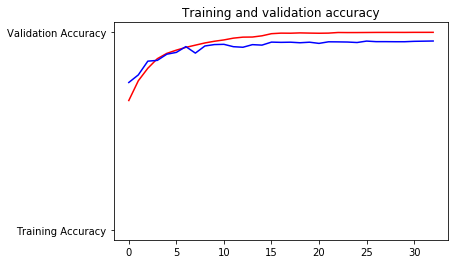

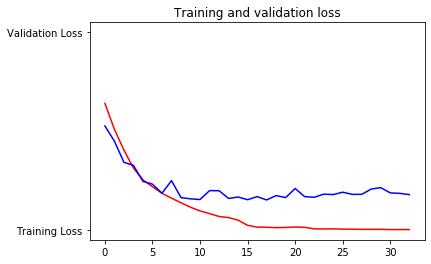

In [0]:
# PLOT LOSS AND ACCURACY 
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')

# Desired output. Charts with training and validation metrics. No crash :)

#load Model

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
batch_normalization (BatchNo (None, 298, 298, 16)      64        
_________________________________________________________________
activation (Activation)      (None, 298, 298, 16)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
dropout (Dropout)            (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
batch_normalization_1 (Batch (None, 147, 147, 32)      1

In [0]:
LOG_DIR

'/content/drive/My Drive/logs/cat_dog/'

In [0]:
model.load_weights(LOG_DIR + 'ep036-loss0.119-val_loss0.129.h5')

# Predict

## REMEMBER TO ADD (1/255) !!!

In [0]:
# Here's a codeblock just for fun. You should be able to upload an image here 
# and have it classified without crashing

import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(150,150))
  x = image.img_to_array(img) * (1/255)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a dog")
  else:
    print(fn + " is a cat")

Saving cat1.jpg to cat1 (2).jpg
Saving cat2.jpg to cat2 (1).jpg
Saving cat3.jpg to cat3 (2).jpg
Saving cat4.jpg to cat4 (4).jpg
Saving cat5.jpg to cat5 (1).jpg
Saving cat6.jpg to cat6 (3).jpg
Saving cat7.jpg to cat7 (1).jpg
Saving cat8.jpg to cat8 (1).jpg
Saving dog1.jpg to dog1 (1).jpg
Saving dog2.jpg to dog2 (1).jpg
Saving dog3.jpg to dog3 (2).jpg
Saving dog4.jpg to dog4 (2).jpg
Saving dog5.jpg to dog5 (1).jpg
Saving dog6.jpg to dog6 (1).jpg
Saving dog7.jpg to dog7 (1).jpg
Saving dog8.jpg to dog8 (1).jpg
[[0.76533794]]
[0.76533794]
cat1.jpg is a dog
[[0.19487248]]
[0.19487248]
cat2.jpg is a cat
[[0.0174355]]
[0.0174355]
cat3.jpg is a cat
[[0.00066156]]
[0.00066156]
cat4.jpg is a cat
[[0.00593456]]
[0.00593456]
cat5.jpg is a cat
[[0.02451831]]
[0.02451831]
cat6.jpg is a cat
[[0.2138831]]
[0.2138831]
cat7.jpg is a cat
[[0.4728716]]
[0.4728716]
cat8.jpg is a cat
[[1.]]
[1.]
dog1.jpg is a dog
[[0.9999894]]
[0.9999894]
dog2.jpg is a dog
[[0.3093538]]
[0.3093538]
dog3.jpg is a cat
[[0.9997

In [0]:
del model

In [0]:
# WITH BatchNormalization
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D( 16,(3,3),activation=None,input_shape=(300,300,3)),
  tf.keras.layers.BatchNormalization(momentum=0.9),
  tf.keras.layers.Activation('relu'),
  tf.keras.layers.MaxPool2D(),
  # tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Conv2D( 32,(3,3),activation=None),
  tf.keras.layers.BatchNormalization(momentum=0.9),
  tf.keras.layers.Activation('relu'),
  tf.keras.layers.MaxPool2D(),
  # tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Conv2D( 64,(3,3),activation=None),
  tf.keras.layers.BatchNormalization(momentum=0.9),
  tf.keras.layers.Activation('relu'),
  tf.keras.layers.MaxPool2D(),
  # tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Conv2D(128,(3,3),activation=None),
  tf.keras.layers.BatchNormalization(momentum=0.9),
  tf.keras.layers.Activation('relu'),
  tf.keras.layers.MaxPool2D(),

  tf.keras.layers.Conv2D(256,(3,3),activation=None),
  tf.keras.layers.BatchNormalization(momentum=0.9),
  tf.keras.layers.Activation('relu'),
  tf.keras.layers.MaxPool2D(),

  # tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512,activation=None),
  tf.keras.layers.BatchNormalization(momentum=0.9),
  tf.keras.layers.Activation('relu'),
  # tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Dense(1,activation="sigmoid")
# YOUR CODE HERE
])


In [0]:
model.load_weights(LOG_DIR + 'ep036-loss0.119-val_loss0.129.h5')

In [0]:
model.compile(optimizer=Adam(lr=LR), loss='binary_crossentropy', metrics=['acc'])